In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns

from datetime import datetime

# Load the dataset

In [2]:
# Load the CSV 
file_path = 'phishing.csv'
phishingData = pd.read_csv(file_path)

# Display 
phishingData.head()

,_id,assets_downloaded,brands,domain,features.css,features.html,features.text,folder_path,language,protocol,...,security_valid_from,security_valid_to,url,whois_domain_age,whois_raw_text,whois_registrar,whois_registrar_url,whois_registry_created_at,whois_registry_expired_at,whois_registry_updated_at
0,64038b0e2e9df665fc7353ff,0.700000,"[""microsoft""]",compactdrivesolu.blob.core.windows.net,"{""box-sizing"": [""inherit"", ""border-box""], ""mar...","[""html"", ""head"", ""meta"", ""title"", ""style"", ""li...",\n Sharing Link Validation\n \n Verify Your Id...,phishing/64038b0e2e9df665fc7353ff,en,http/1.1,...,2022-12-23T11:53:59.000Z,2023-12-23T11:53:59.000Z,https://compactdrivesolu.blob.core.windows.net...,10067.0,Domain Name: WINDOWS.NET\r\n Registry Dom...,NaN,http://www.markmonitor.com,1995-08-10T04:00:00.000Z,2023-06-04T16:06:16.000Z,2022-05-09T19:17:07.000Z
1,640393d7a8281bcf8be471a4,0.857143,"[""microsoft""]",bafkreifefpvr26zfog4s27pxbtd3tqmtatd34e374cvv4...,"{""margin"": [""0""], ""font-family"": [""Raavi"", ""Mi...","[""html"", ""head"", ""script"", ""meta"", ""title"", ""m...",\n Sign in to your account\n \n Sign in\n \n E...,phishing/640393d7a8281bcf8be471a4,en,h2,...,2023-01-10T17:16:24.000Z,2023-04-10T17:16:23.000Z,https://bafkreifefpvr26zfog4s27pxbtd3tqmtatd34...,2199.0,Domain Name: dweb.link\r\nRegistry Domain ID: ...,NaN,www.cscglobal.com,2017-02-24T01:05:26.675Z,2024-02-24T01:05:26.675Z,2023-01-23T21:09:56.296Z
2,640394d3a8281bcf8be471a8,0.500000,"[""ups""]",ups-trackid728912.is-certified.com,"{""box-sizing"": [""border-box""], ""text-rendering...","[""html"", ""head"", ""meta"", ""title"", ""meta"", ""met...",\n Global Shipping & Logistics Services | UPS ...,phishing/640394d3a8281bcf8be471a8,en,http/1.1,...,NaN,NaN,http://ups-trackid728912.is-certified.com/Find...,5901.0,Domain Name: IS-CERTIFIED.COM\r\n Registr...,NaN,http://www.tucows.com,2007-01-04T14:10:49.000Z,2024-01-04T14:10:49.000Z,2022-12-06T06:48:20.000Z
3,64039cc2a8281bcf8be471b5,1.000000,"[""microsoft""]",southcoastaletrail.net.au,"{""height"": [""44px"", ""100%"", ""24px"", ""40px"", ""3...","[""html"", ""head"", ""meta"", ""title"", ""link"", ""bod...",\n Sharing Link Validation\n \n Onedrive\n \n ...,phishing/64039cc2a8281bcf8be471b5,en,h2,...,2022-10-20T00:00:00.000Z,2023-10-30T23:59:59.000Z,https://southcoastaletrail.net.au/original/tec...,NaN,WHOIS LIMIT EXCEEDED\n,NaN,NaN,NaN,NaN,NaN
4,6403a15fa8281bcf8be471c4,1.000000,"[""dhl""]",sksadesign.com,"{""width"": [""55px"", ""7px"", ""240px"", ""360px"", ""4...","[""html"", ""head"", ""meta"", ""meta"", ""title"", ""lin...",\n DHL\n \n 專業及可靠的付運服務\n \n 客户服务\n \n 全天候24小時客...,phishing/6403a15fa8281bcf8be471c4,ko,http/1.1,...,2023-01-16T04:36:30.000Z,2023-04-16T04:36:29.000Z,https://sksadesign.com/@/GlobalSources/,3665.0,Domain Name: SKSADESIGN.COM\r\n Registry ...,NaN,http://www.publicdomainregistry.com,2013-01-17T06:47:49.000Z,2024-01-17T06:47:49.000Z,2022-12-19T06:11:52.000Z


In [3]:
not_phishingData = pd.read_csv('not-phishing.csv')
not_phishingData.head()

,_id,assets_downloaded,domain,features.css,features.html,features.text,folder_path,language,protocol,remote_ip_address,...,security_valid_from,security_valid_to,url,whois_domain_age,whois_raw_text,whois_registrar,whois_registrar_url,whois_registry_created_at,whois_registry_expired_at,whois_registry_updated_at
0,642ea80461bb656e3eb3ee0d,0.890756,edition.cnn.com,"{""color"": [""#555555"", ""#68B631"", ""#262626"", ""#...","[""html"", ""head"", ""meta"", ""meta"", ""meta"", ""meta...","\n CNN International - Breaking News, US News,...",phishing/642ea80461bb656e3eb3ee0d,en,h2,2a04:4e42:200::773,...,2022-12-09T19:19:20.000Z,2024-01-10T19:19:19.000Z,https://edition.cnn.com/,10778.0,Domain Name: CNN.COM\r\n Registry Domain ...,NaN,http://cscdbs.com,1993-09-22T00:00:00.000Z,2026-09-21T00:00:00.000Z,2020-10-20T13:09:44.000Z
1,642ea9b761bb656e3eb3ee0f,0.956989,booking.miramonti.aurturist.com,"{""-webkit-box-sizing"": [""border-box""], ""box-si...","[""html"", ""head"", ""style"", ""style"", ""style"", ""s...",\n Aurturist Miramonti S. Candido\n \n Ihr Jav...,phishing/642ea9b761bb656e3eb3ee0f,de,h2,135.125.240.140,...,2023-03-27T09:01:02.000Z,2023-06-25T09:01:01.000Z,https://booking.miramonti.aurturist.com/,2594.0,Domain Name: AURTURIST.COM\r\n Registry D...,NaN,http://www.ionos.com,2016-02-18T09:34:35.000Z,2024-02-18T09:34:35.000Z,2020-02-10T07:14:18.000Z
2,642eaa1961bb656e3eb3ee11,0.916667,www.cours2soutien.fr,"{""background"": [""#EFF1F2"", ""transparent""], ""bo...","[""html"", ""head"", ""meta"", ""meta"", ""meta"", ""meta...",\n Besoin de cours de soutien scolaire à Saint...,phishing/642eaa1961bb656e3eb3ee11,fr,h2,34.117.168.233,...,2023-03-27T09:01:13.000Z,2023-06-25T09:01:12.000Z,https://www.cours2soutien.fr/,390.0,%%\n%% This is the AFNIC Whois server.\n%%\n%%...,NaN,NaN,2022-03-02T08:36:55.000Z,2024-03-02T08:36:55.000Z,2023-01-27T09:52:07.813Z
3,642eaa7c61bb656e3eb3ee14,0.924242,canva-note.com,"{""box-sizing"": [""border-box"", ""content-box""], ...","[""html"", ""head"", ""meta"", ""meta"", ""meta"", ""meta...",\n トップページ\n \n TOP\n \n Canva使い方\n \n オンラインレッス...,phishing/642eaa7c61bb656e3eb3ee14,ja,h2,160.251.71.153,...,2023-02-25T06:52:04.000Z,2023-05-26T06:52:03.000Z,https://canva-note.com/,168.0,Domain Name: CANVA-NOTE.COM\r\n Registry ...,NaN,http://gmo.jp,2022-10-10T02:26:20.000Z,2023-10-10T02:26:20.000Z,2022-10-10T11:26:22.000Z
4,642eaa9a61bb656e3eb3ee16,0.750000,ww1.learningplusonsemi.com,"{""font-family"": [""Arial"", ""sans-serif""], ""heig...","[""html"", ""head"", ""meta"", ""meta"", ""link"", ""titl...",\n Learningplusonsemi.com\n \n Learningplusons...,phishing/642eaa9a61bb656e3eb3ee16,en,http/1.1,63.141.242.46,...,NaN,NaN,http://ww1.learningplusonsemi.com/,5.0,Domain Name: LEARNINGPLUSONSEMI.COM\r\n R...,NaN,http://www.godaddy.com,2023-03-21T15:28:27.000Z,2024-03-21T15:28:27.000Z,2023-03-21T15:28:27.000Z


In [4]:
column_names = phishingData.columns

print(column_names) 

Index(['_id', 'assets_downloaded', 'brands', 'domain', 'features.css',
       'features.html', 'features.text', 'folder_path', 'language', 'protocol',
       'remote_ip_address', 'remote_ip_asn', 'remote_ip_country',
       'remote_ip_domain', 'remote_ip_isp', 'remote_ip_isp_org', 'scan_date',
       'security_issuer', 'security_protocol', 'security_state',
       'security_valid_from', 'security_valid_to', 'url', 'whois_domain_age',
       'whois_raw_text', 'whois_registrar', 'whois_registrar_url',
       'whois_registry_created_at', 'whois_registry_expired_at',
       'whois_registry_updated_at'],
      dtype='object')


In [5]:
# Display the number of rows and columns in the dataset
rows, columns = phishingData.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 5151
Number of columns: 30


The dataset contains various columns that could potentially be used to derive or analyze phishing detection metrics, response rates, and false positives. Here are a few recommendations based on your metrics:

**Detection Rate:**

Column: assets_downloaded (as a possible proxy to understand if users interacted with phishing assets).

**Response Rate:**

Column: protocol and features.text might help categorize user or system responses based on interactions and observed behavior.


**False Positive Rate:**

Column: domain and features.html to identify discrepancies between expected content and actual content, aiding in false positive analysis.


**User Demographics:**

Column: This data does not directly include demographics like age or gender. If available in a related dataset, it could be merged for further insights.

**Device Type Usage:**

Column: protocol and folder_path can sometimes infer the type of device or OS, though this would need additional device-specific columns for accurate determination.

In [6]:
phishingData.columns

Index(['_id', 'assets_downloaded', 'brands', 'domain', 'features.css',
       'features.html', 'features.text', 'folder_path', 'language', 'protocol',
       'remote_ip_address', 'remote_ip_asn', 'remote_ip_country',
       'remote_ip_domain', 'remote_ip_isp', 'remote_ip_isp_org', 'scan_date',
       'security_issuer', 'security_protocol', 'security_state',
       'security_valid_from', 'security_valid_to', 'url', 'whois_domain_age',
       'whois_raw_text', 'whois_registrar', 'whois_registrar_url',
       'whois_registry_created_at', 'whois_registry_expired_at',
       'whois_registry_updated_at'],
      dtype='object')

In [6]:
# # Wordcloud
# from wordcloud import WordCloud

# # Combine all text from 'clickbait_words' into a single string
# text_data = ' '.join(phishingData[''].dropna().astype(str))

# # Generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# # Display the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Hide axes
# plt.show()

In [ ]:
# TO PREDICT THE DETECTION RATE

## TASK 1

**Detection Rate**

assets_downloaded (as a possible proxy to understand if users interacted with phishing assets). 

**NOTE**

From the dataset i can't find detection column so i set a threshold =  0.5 

In [ ]:
# Check for missing values in 'assets_downloaded' column and drop those rows
phishingData = phishingData.dropna(subset=['assets_downloaded'])

# Define a threshold to approximate detection
threshold = 0.5 
phishingData['Detection'] = phishingData['assets_downloaded'].apply(lambda x: 1 if x > threshold else 0)

# Feature and target variable
X = phishingData[['assets_downloaded']]
y = phishingData['Detection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9990300678952473
Confusion Matrix:
 [[327   0]
 [  1 703]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       704

    accuracy                           1.00      1031
   macro avg       1.00      1.00      1.00      1031
weighted avg       1.00      1.00      1.00      1031




## TASK 2

**Response Rate:**

Column: protocol and features.text might help categorize user or system responses based on interactions and observed behavior.


In [21]:
# Check for missing values
phishing_data = phishingData.dropna(subset=['protocol', 'features.text'])

# Define function to categorize response based on `protocol` and `features.text`
def categorize_response(row):
    # Example condition: Use HTTPS protocol as a proxy for more secure interactions
    if "https" in row['protocol'].lower():
        return 1  # Indicates a positive response
    
    # Example condition: Check if features.text has interaction keywords
    interaction_keywords = ["login", "verify", "submit", "enter"]
    if any(keyword in row['features.text'].lower() for keyword in interaction_keywords):
        return 1  # Indicates a positive response
    
    # Otherwise, categorize as no response or lower engagement
    return 0

# Apply the function to create a new 'Response' column
phishing_data['Response'] = phishing_data.apply(categorize_response, axis=1)

# Calculate response rate as the proportion of positive responses
response_rate = phishing_data['Response'].mean()
print("Response Rate:", response_rate)

Response Rate: 0.42341292952824694


**NOTE FROM THE RESULT OBTAINED:**
 
A Response Rate of 0.4234 (or approximately 42.34%) means that, in the dataset used, about 42.34% of the interactions were categorized as having a positive response based on the conditions specified. This implies that for those entries:

Users or systems were likely engaging with phishing content (e.g., by attempting to "login" or "verify").
A secure protocol (https) or specific interaction keywords in features.text were detected.
This rate gives you an indication of how often users or systems interacted with phishing attempts in a way that could lead to a successful response. If you're evaluating user behavior, this metric might suggest the need for further user awareness or system improvements to detect and prevent phishing interactions.

## TASK 3

**FALSE POSITIVE RATE**

Column: domain and features.html to identify discrepancies between expected content and actual content, aiding in false positive analysis.

In [23]:
phishing_data = phishingData.dropna(subset=['domain', 'features.html'])

# Expanded list of known legitimate domains
legitimate_domains = [
    "microsoft.com", "google.com", "paypal.com", "apple.com", "amazon.com",
    "bankofamerica.com", "wellsfargo.com", "chase.com", "linkedin.com",
    "facebook.com", "twitter.com", "instagram.com", "github.com"
]

# Broadened list of phishing indicators
phishing_indicators = [
    "password", "login", "verify", "account", "secure", "enter details",
    "click here", "confirm", "update info", "urgent", "limited access",
    "recover", "suspend", "attention required", "payment"
]

# Define a function to detect false positives
def detect_false_positive(row):
    # Check if the domain is from a legitimate source
    if any(domain in row['domain'] for domain in legitimate_domains):
        # Check for phishing indicators in `features.html`
        if any(indicator in row['features.html'].lower() for indicator in phishing_indicators):
            return 1  # False Positive: legitimate domain with phishing-like content
    return 0  # Not a false positive

# Apply the function to create a new 'FalsePositive' column
phishing_data['FalsePositive'] = phishing_data.apply(detect_false_positive, axis=1)

# Calculate the False Positive Rate
# False Positive Rate = False Positives / Legitimate Cases
total_legitimate_cases = phishing_data['domain'].apply(lambda x: any(domain in x for domain in legitimate_domains)).sum()
false_positive_count = phishing_data['FalsePositive'].sum()
false_positive_rate = false_positive_count / total_legitimate_cases if total_legitimate_cases > 0 else 0

print("False Positive Rate:", false_positive_rate)

False Positive Rate: 0.0


In [25]:
# Expand legitimate domains to include subdomains
def is_legitimate_domain(domain):
    return any(legit_domain in domain.lower() for legit_domain in legitimate_domains)

# More sophisticated phishing detection
def detect_false_positive(row):
    # Convert domain to lowercase for case-insensitive matching
    domain = row['domain'].lower()
    html_content = row['features.html'].lower()
    
    # Check if it's a legitimate domain (including subdomains)
    if is_legitimate_domain(domain):
        # Count number of phishing indicators present
        indicator_count = sum(1 for indicator in phishing_indicators 
                            if indicator in html_content)
        
        # Consider it a false positive if multiple indicators are present
        return 1 if indicator_count >= 2 else 0
    return 0

# Add weights to different indicators
weighted_indicators = {
    "password": 2.0,
    "login": 1.5,
    "verify": 1.5,
    "account": 1.0,
    # ... add weights for other indicators
}

# Calculate confidence score
def calculate_phishing_confidence(html_content):
    score = 0
    html_lower = html_content.lower()
    for indicator, weight in weighted_indicators.items():
        if indicator in html_lower:
            score += weight
    return score

In [26]:
legitimate_domains.extend([
    "outlook.com", "gmail.com", "yahoo.com", "dropbox.com",
    "salesforce.com", "office365.com", "live.com"
])

In [27]:
phishing_indicators.extend([
    "unusual url", "mismatch domain", "security alert",
    "account blocked", "billing update", "confirm identity"
])

In [28]:
# Add validation metrics
print("Total samples analyzed:", len(phishing_data))
print("Legitimate domains found:", total_legitimate_cases)
print("False positives found:", false_positive_count)
print("Unique domains in dataset:", phishing_data['domain'].nunique())

Total samples analyzed: 5151
Legitimate domains found: 11
False positives found: 0
Unique domains in dataset: 5082


## Added Further Analyses as a replacement:
### Brand and Domain analysis
### Geolocation/Demographics (by country)
### Security protocols
### State of Secuirty
### Domain Age

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_39291/2180623768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="coolwarm")


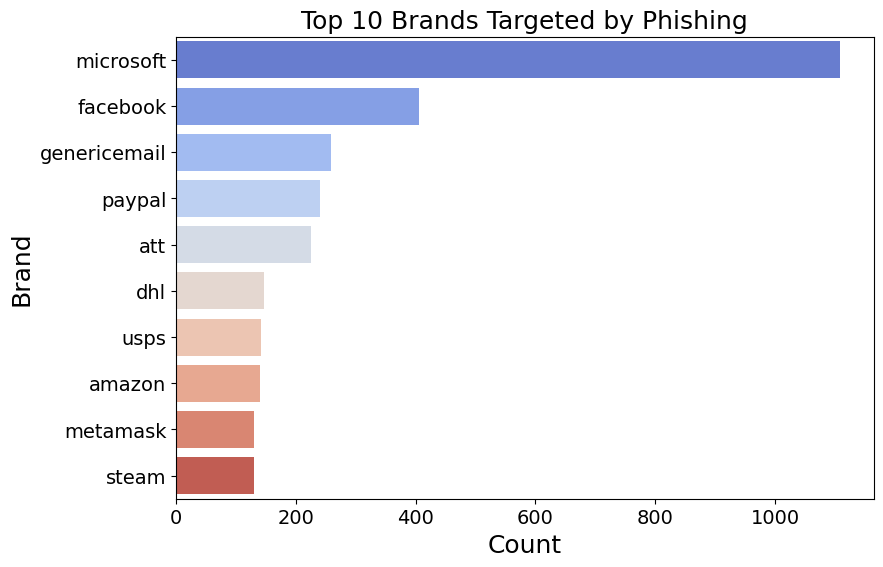

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_39291/2180623768.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")


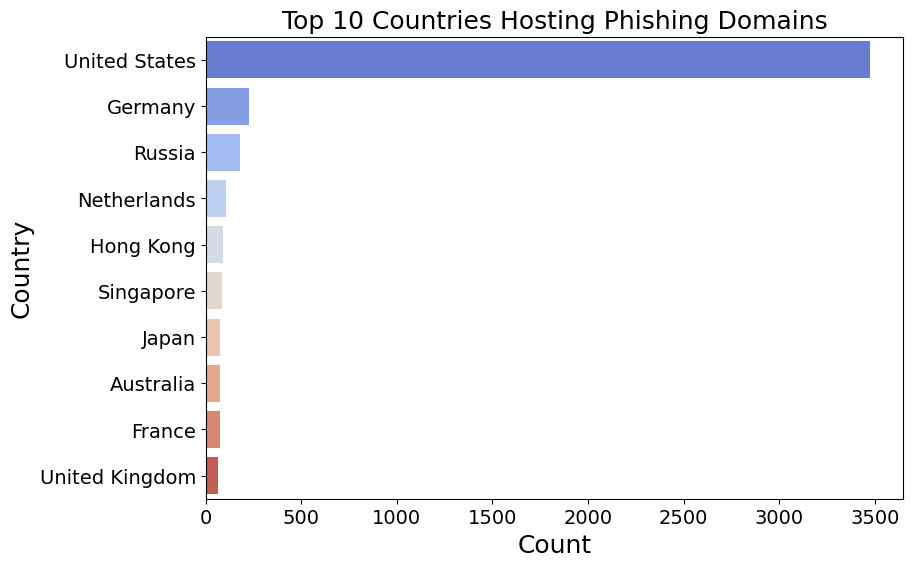

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_39291/2180623768.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=security_protocol_counts.values, y=security_protocol_counts.index, palette="coolwarm")


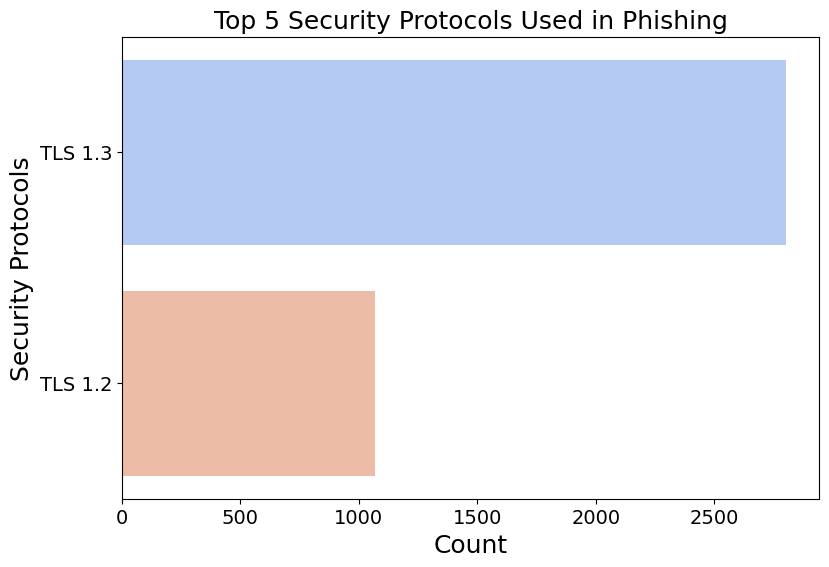

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_39291/2180623768.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=security_state_counts.values, y=security_state_counts.index, palette="coolwarm")


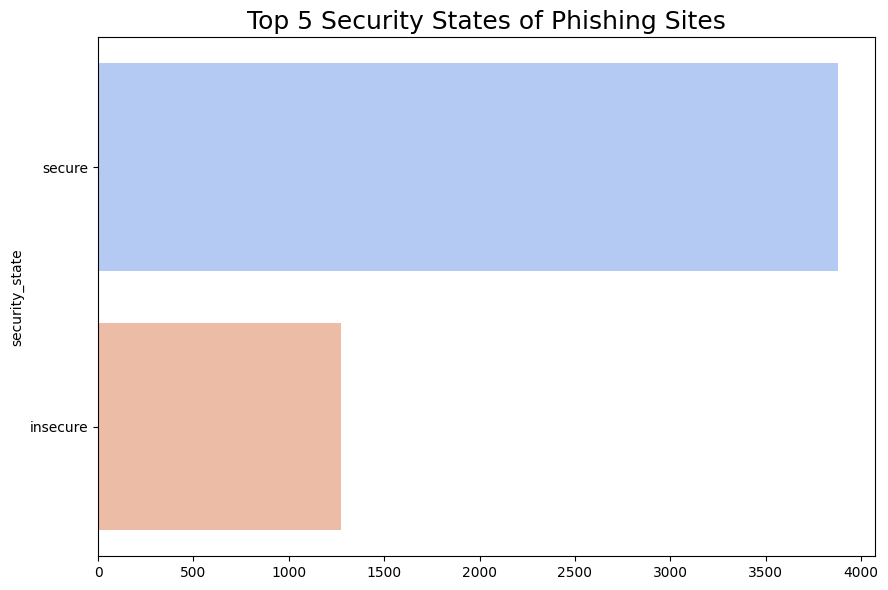

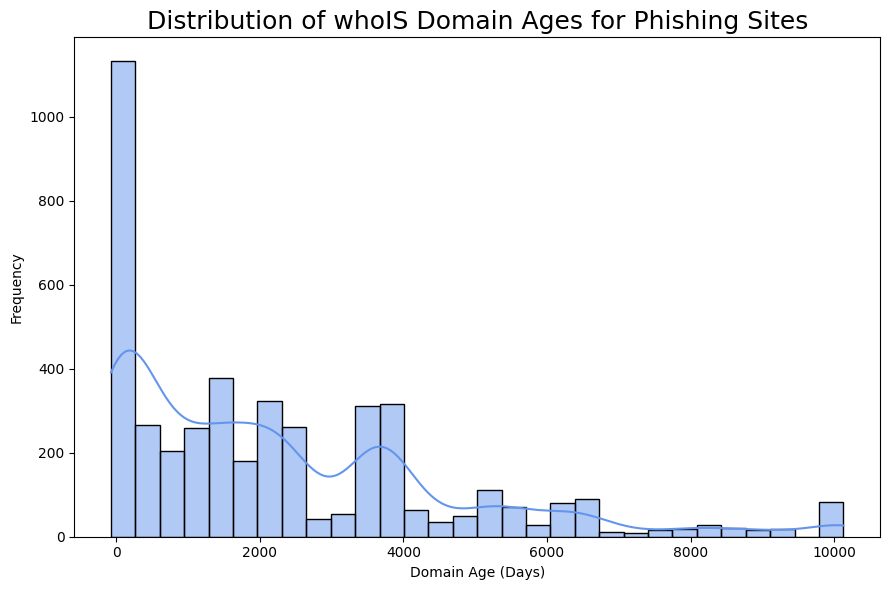

In [8]:
# Analysis 6: Brand and Domain Analysis
# Count the frequency of each brand mentioned in the 'brands' column

# Ensure the 'brands' column is treated as a string to handle any non-string values properly
phishingData['brands'] = phishingData['brands'].astype(str)
phishingData['brands'] = phishingData['brands'].str.strip('[]').str.replace('"', '').str.split(',')

# Re-calculate brand frequencies for top 10 brands
brand_counts = phishingData['brands'].explode().value_counts().head(10)

# Plotting the top 10 brands
plt.figure(figsize=(9, 6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette="coolwarm")
plt.title("Top 10 Brands Targeted by Phishing", fontsize=18)
#plt.tight_layout()
plt.xlabel("Count", fontsize=18)
plt.ylabel("Brand", fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
#plt.savefig('figures/Top_10_brands_targeted_by_phishing.png', dpi=300)
plt.show()
plt.close();

# Analysis 7: Geolocation Analysis
# Count the frequency of phishing attempts by country
country_counts = phishingData['remote_ip_country'].value_counts().head(10)  # Top 10 countries

# Plotting the top 10 countries
plt.figure(figsize=(9, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")
plt.title("Top 10 Countries Hosting Phishing Domains", fontsize=18)
#plt.tight_layout()
plt.xlabel("Count", fontsize=18)
plt.ylabel("Country", fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
#plt.savefig('figures/Top_10_Countries_Hosting_Phishing.png', dpi=300)
plt.show()
plt.close();

# Analysis 8: Security Protocol Analysis
# Count the frequency of different security states and protocols
security_protocol_counts = phishingData['security_protocol'].value_counts().head(2)  # Top 2 security protocols
security_state_counts = phishingData['security_state'].value_counts().head(5)  # Top 5 security states

# Plotting security protocols
plt.figure(figsize=(9, 6))
sns.barplot(x=security_protocol_counts.values, y=security_protocol_counts.index, palette="coolwarm")
plt.title("Top 5 Security Protocols Used in Phishing", fontsize=18)
#plt.tight_layout()
plt.xlabel("Count", fontsize=18)
plt.ylabel("Security Protocols", fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
#plt.savefig('figures/Top_5_Security_Protocols.png', dpi=300)
plt.show()
plt.close();

# Plotting security states
plt.figure(figsize=(9, 6))
sns.barplot(x=security_state_counts.values, y=security_state_counts.index, palette="coolwarm")
plt.title("Top 5 Security States of Phishing Sites", fontsize=18)
plt.tight_layout()
#plt.savefig('figures/Top_5_Security_States.png', dpi=300)
plt.show()
plt.close();

# Analysis 9: Domain Age Analysis
# Removing NaN values in whois_domain_age for analysis and converting to integer
domain_age_cleaned = phishingData['whois_domain_age'].dropna()
plt.figure(figsize=(9, 6))
sns.histplot(domain_age_cleaned, kde=True, bins=30, color="cornflowerblue")
plt.title("Distribution of whoIS Domain Ages for Phishing Sites", fontsize=18)
plt.xlabel("Domain Age (Days)")
plt.ylabel("Frequency")
plt.tight_layout()
#plt.savefig('figures/Distribution_of_domain_age.png', dpi=300)
plt.show()
plt.close();

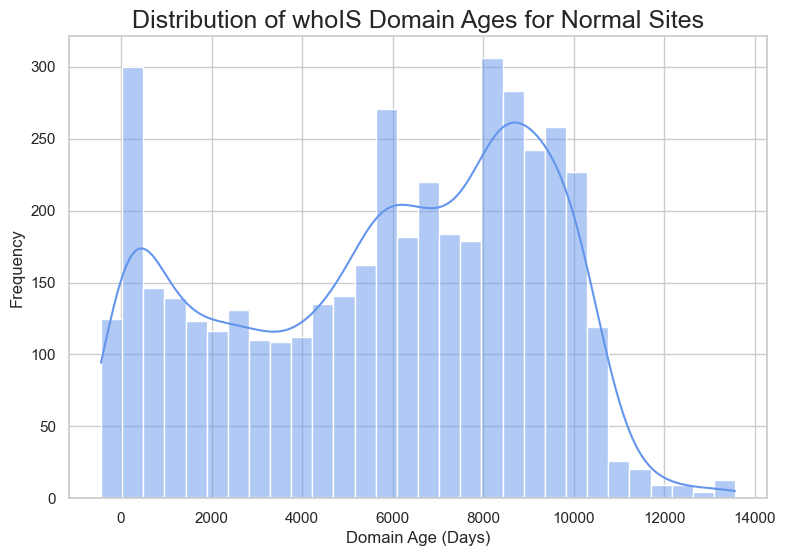

In [9]:
domain_age_cleaned2 = not_phishingData['whois_domain_age'].dropna()
plt.figure(figsize=(9, 6))
sns.histplot(domain_age_cleaned2, kde=True, bins=30, color="cornflowerblue")
plt.title("Distribution of whoIS Domain Ages for Normal Sites", fontsize=18)
plt.xlabel("Domain Age (Days)")
plt.ylabel("Frequency")
plt.savefig('figures/Distribution_of_domain_age_not_phishing.png', dpi=300)
plt.show()
plt.close(); # to free up space

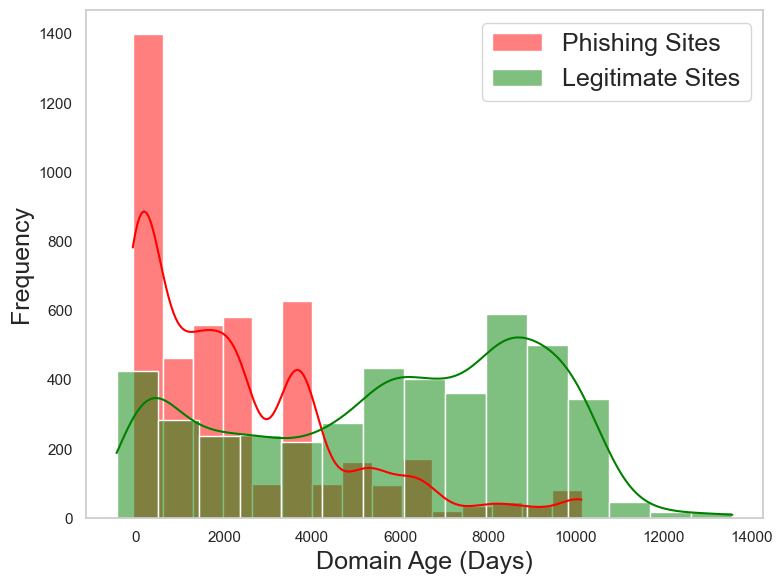

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

# Comparison plot of Domain Ages for phishing sites and legitimate sites
sns.histplot(domain_age_cleaned, kde=True, bins=15, color="red", label = 'Phishing Sites', ax=ax)
sns.histplot(domain_age_cleaned2, kde=True, bins=15, color="green", label = 'Legitimate Sites', ax=ax)

ax.grid(False)
ax.legend(fontsize=18)
ax.set_xlabel('Domain Age (Days)', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)

plt.tight_layout()
plt.savefig('figures/Comparison of Domain Age', dpi=300)
plt.show()
plt.close();

## Anomaly Detection

### Since phisihng sites often exhibit distinctive features (e.g. young domain age, unusal SSL configurations), anomaly detection idenifty outliers. 

### Isolation Forest: Useful for identifying rare patterns in phishing data.
### One-Class SVM: Suitable for finding unusual instances if you only have a baseline “normal” dataset for comparison.
### Autoencoders: A deep learning approach that can reconstruct typical data patterns and flag outliers as potential phishing cases.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Selecting relevant numerical features for anomaly detection
# Using columns such as 'assets_downloaded', 'whois_domain_age', and a few others indicative of phishing.
selected_columns = ['assets_downloaded', 'whois_domain_age', 'remote_ip_asn']

# Extract and preprocess the selected columns
phishingData_selected = phishingData[selected_columns].copy()

# Handling missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
phishingData_imputed = imputer.fit_transform(phishingData_selected)

# Standardizing the data to normalize feature scales
scaler = StandardScaler()
phishingData_scaled = scaler.fit_transform(phishingData_imputed)

# 1. Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest_preds = isolation_forest.fit_predict(phishingData_scaled)

# 2. One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
one_class_svm_preds = one_class_svm.fit_predict(phishingData_scaled)

# Counting the number of anomalies detected by each model (-1 indicates anomaly)
isolation_anomalies = np.sum(isolation_forest_preds == -1)
svm_anomalies = np.sum(one_class_svm_preds == -1)

isolation_anomalies, svm_anomalies

(np.int64(257), np.int64(260))

In [13]:
#!pip install matplotlib-venn

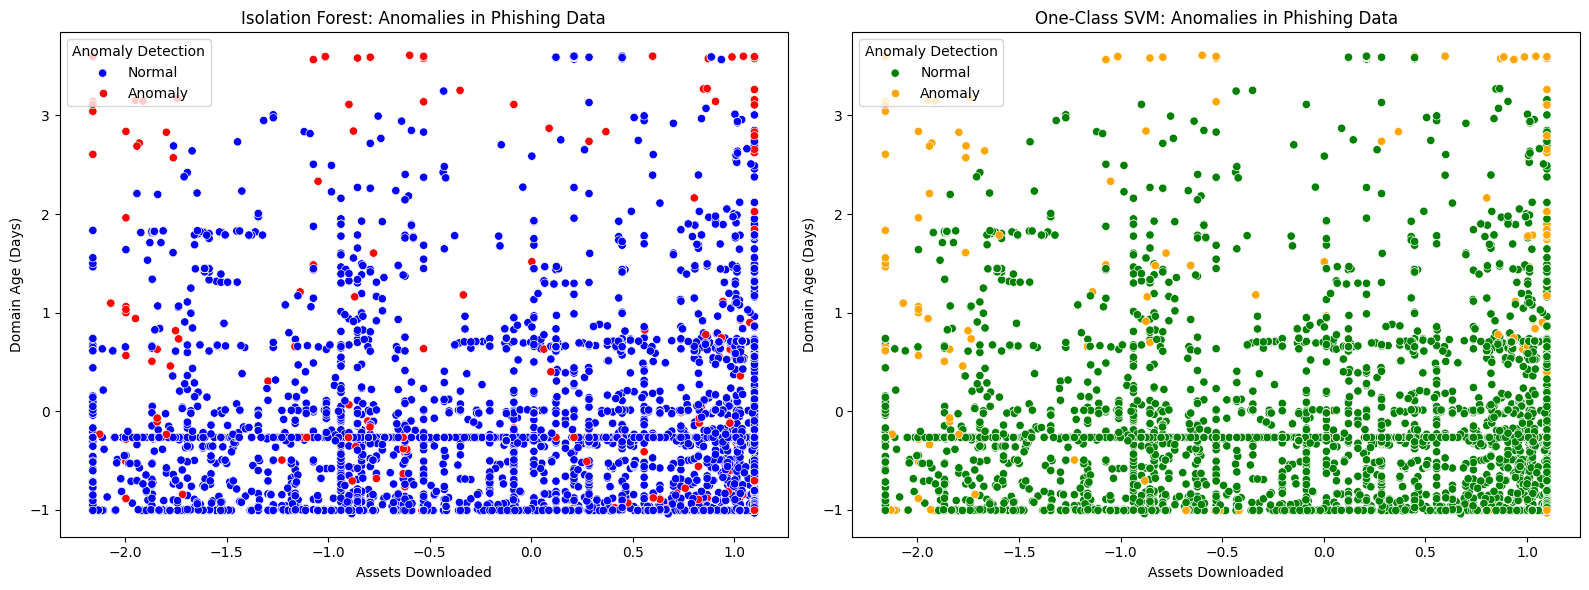

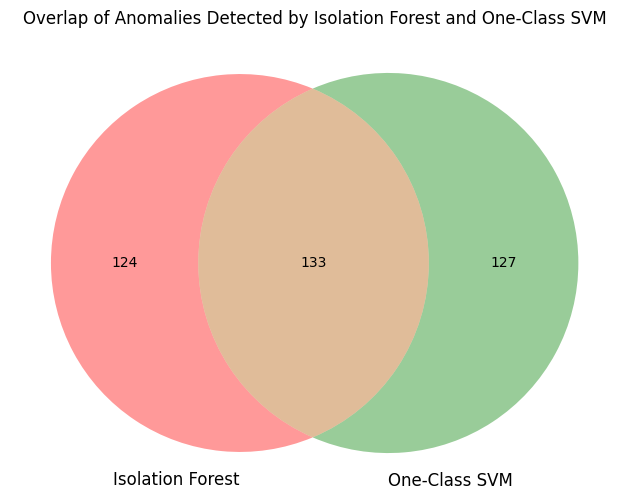

In [31]:
from matplotlib_venn import venn2

# Preparing data for visualization by adding predictions as columns
phishingData_visual = pd.DataFrame(phishingData_scaled, columns=selected_columns)
phishingData_visual['IsolationForest'] = isolation_forest_preds
phishingData_visual['OneClassSVM'] = one_class_svm_preds

# Setting up the figure for scatter plots
plt.figure(figsize=(16, 6))

# Scatter Plot for Isolation Forest anomalies
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=phishingData_visual['assets_downloaded'],
    y=phishingData_visual['whois_domain_age'],
    hue=phishingData_visual['IsolationForest'],
    palette={1: 'blue', -1: 'red'},
    legend='full'
)
plt.title("Isolation Forest: Anomalies in Phishing Data")
plt.xlabel("Assets Downloaded")
plt.ylabel("Domain Age (Days)")
plt.legend(title="Anomaly Detection", labels=["Normal", "Anomaly"])

# Scatter Plot for One-Class SVM anomalies
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=phishingData_visual['assets_downloaded'],
    y=phishingData_visual['whois_domain_age'],
    hue=phishingData_visual['OneClassSVM'],
    palette={1: 'green', -1: 'orange'},
    legend='full'
)
plt.title("One-Class SVM: Anomalies in Phishing Data")
plt.xlabel("Assets Downloaded")
plt.ylabel("Domain Age (Days)")
plt.legend(title="Anomaly Detection", labels=["Normal", "Anomaly"])

plt.tight_layout()
plt.show()

# Venn Diagram comparing Isolation Forest and One-Class SVM anomalies
isolation_anomaly_set = set(phishingData_visual[phishingData_visual['IsolationForest'] == -1].index)
svm_anomaly_set = set(phishingData_visual[phishingData_visual['OneClassSVM'] == -1].index)

plt.figure(figsize=(8, 6))
venn2([isolation_anomaly_set, svm_anomaly_set], ('Isolation Forest', 'One-Class SVM'))
plt.title("Overlap of Anomalies Detected by Isolation Forest and One-Class SVM")
plt.show()

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Set input dimension (number of features) and encoding dimension
input_dim = phishingData_scaled.shape[1]  # Number of features in the dataset
encoding_dim = 2  # Size of the encoded (latent) representation

# Define the layers
input_layer = Input(shape=(input_dim,))
# Encoder: Compress the input to the encoding dimension
encoder = Dense(encoding_dim, activation="relu")(input_layer)
# Decoder: Reconstruct the input from the encoding dimension
decoder = Dense(input_dim, activation="sigmoid")(encoder)

# Build the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Train the model on the scaled phishing data
history = autoencoder.fit(phishingData_scaled, phishingData_scaled,
                          epochs=50, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)


Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1444 - val_loss: 1.1756
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 1.0744 - val_loss: 1.1096
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1.0319 - val_loss: 1.0468
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.9613 - val_loss: 0.9928
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.9129 - val_loss: 0.9565
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.8520 - val_loss: 0.9317
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.8442 - val_loss: 0.9136
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.8347 - val_loss: 0.8989
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.8024 - val_loss: 0.8866
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.7804 - val_loss: 0.8758
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - loss: 0.8273 - val_loss: 0.8660
Epoch 12/50
129/129 ━━━━━━━━━━━━

In [32]:
# Calculate reconstruction error for each data point
reconstructed_data = autoencoder.predict(phishingData_scaled)
reconstruction_errors = np.mean(np.square(phishingData_scaled - reconstructed_data), axis=1)

# Set a threshold for anomalies (e.g., 95th percentile of reconstruction errors)
threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies
anomalies = reconstruction_errors > threshold
num_anomalies = np.sum(anomalies)

print("Number of anomalies detected:", num_anomalies)

NameError: name 'autoencoder' is not defined

## Hierarchical clustering 
### May reveal hierarchical patterns, such as brands that are often targeted together.

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

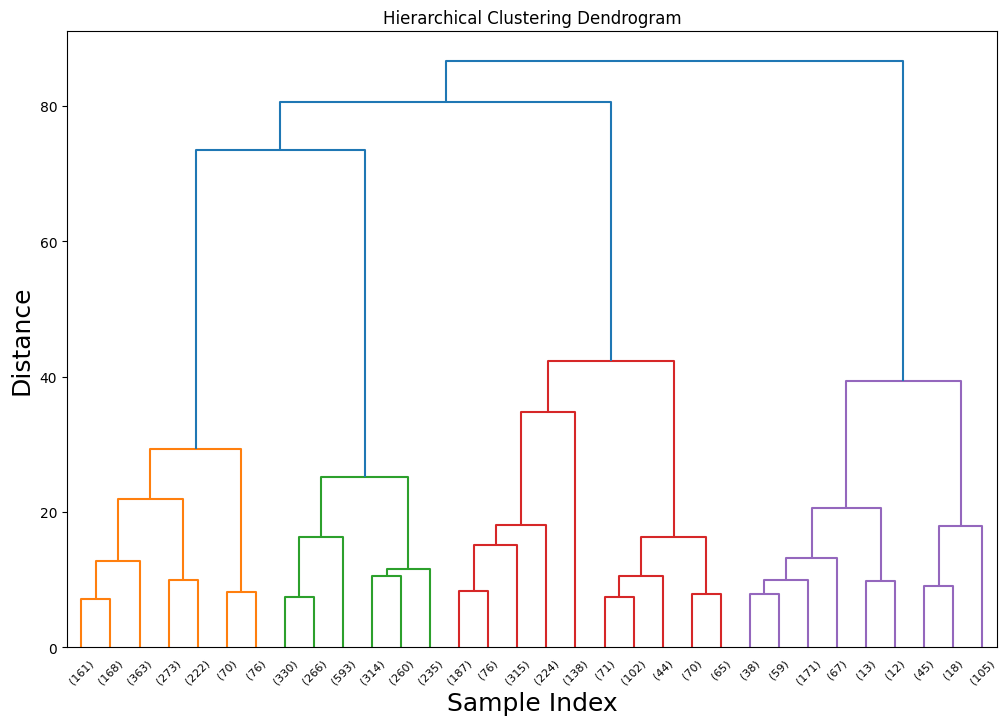

In [39]:
# Perform hierarchical clustering on the preprocessed data
linked = linkage(phishingData_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True, leaf_rotation=45, leaf_font_size=8, truncate_mode='lastp', p=32)

#plt.xticks([])  # This removes the ticks

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index", fontsize=18)
plt.ylabel("Distance", fontsize=18)
#plt.savefig('figures/Hierarchical_clustering_dendogram.png', dpi=300)
plt.show()
plt.close();

# This plot works a substitution for analysis 6,7,8 and 9

In [24]:
import plotly.graph_objects as go

# Get the top 5 brands, countries, and security protocols, and the top 2 security states
top_brands = brand_counts.head(5).index.tolist()
top_countries = country_counts.head(5).index.tolist()
top_protocols = security_protocol_counts.head(2).index.tolist()
top_security_states = security_state_counts.head(2).index.tolist()

# Create a DataFrame with the required data
data = []
for brand in top_brands:
    brand_data = phishingData[phishingData['brands'].apply(lambda x: brand in x)]
    for country in top_countries:
        country_data = brand_data[brand_data['remote_ip_country'] == country]
        for protocol in top_protocols:
            protocol_data = country_data[country_data['security_protocol'] == protocol]
            for state in top_security_states:
                state_count = protocol_data[protocol_data['security_state'] == state].shape[0]
                data.append([brand, country, protocol, state, state_count])

df = pd.DataFrame(data, columns=['Brand', 'Country', 'Protocol', 'State', 'Count'])

In [26]:
# Assign specific colors to each group of nodes
brand_colors = ["#FF6347", "#FFA07A", "#FFD700", "#ADFF2F", "#7FFF00"]  # Colors for top_brands
country_colors = ["#1E90FF", "#87CEFA", "#00BFFF", "#4682B4", "#4169E1"]  # Colors for top_countries
protocol_colors = ["#8A2BE2", "#9932CC"]  # Colors for top_protocols
state_colors = ["#FF1493", "#FF69B4"]  # Colors for top_security_states

# Combine all colors for node coloring
node_colors = brand_colors + country_colors + protocol_colors + state_colors

# Map source and target indices
source = []
target = []
value = []

# Connections from Brand to Country
for i, row in df.iterrows():
    source.append(top_brands.index(row['Brand']))
    target.append(top_countries.index(row['Country']) + len(top_brands))
    value.append(row['Count'])

# Connections from Country to Protocol
for i, row in df.iterrows():
    source.append(top_countries.index(row['Country']) + len(top_brands))
    target.append(top_protocols.index(row['Protocol']) + len(top_brands) + len(top_countries))
    value.append(row['Count'])

# Connections from Protocol to State
for i, row in df.iterrows():
    source.append(top_protocols.index(row['Protocol']) + len(top_brands) + len(top_countries))
    target.append(top_security_states.index(row['State']) + len(top_brands) + len(top_countries) + len(top_protocols))
    value.append(row['Count'])

# Create the alluvial plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=top_brands + top_countries + top_protocols + top_security_states,
        color=node_colors  # Apply the custom colors to nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color='rgba(150, 150, 150, 0.5)'  # Semi-transparent color for links
    )
)])

fig.update_layout(
    title_text="Phishing Analysis: Brands, Countries, Protocols, and Security States",
    font_size=18,
    height=800  # Adjust as needed
)

fig.show()

## ANOTHER APPROACH FOR TASK 1 to 5

In [40]:

phishing_data = phishingData.dropna(subset=['security_state', 'whois_domain_age', 'features.html', 'domain'])

# Define detection logic for phishing (simple heuristic)
def is_phishing(row):
    # Based on SSL validity, domain age, and suspicious keywords in `features.html`
    expired_cert = (
        pd.notna(row['security_valid_to']) and
        pd.to_datetime(row['security_valid_to']).tz_localize(None) < datetime.now()
    )
    domain_age_suspicious = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < 90
    has_suspicious_content = any(
        keyword in row['features.html'].lower()
        for keyword in ["password", "login", "verify", "account", "urgent", "suspended"]
    )
    
    # Classify as phishing if expired certificate, suspicious domain age, or suspicious content is found
    return int(expired_cert or domain_age_suspicious or has_suspicious_content)

# Apply phishing detection heuristic
phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)

# Calculate Detection Rate
detection_rate = phishing_data['predicted_phishing'].mean() * 100
print(f"Detection Rate: {detection_rate:.2f}%")

# Define legitimate domains for False Positive analysis
legitimate_domains = ["microsoft.com", "google.com", "apple.com", "amazon.com", "paypal.com"]

# False Positive calculation
phishing_data['legitimate_domain'] = phishing_data['domain'].apply(
    lambda x: any(ld in x for ld in legitimate_domains)
)
false_positives = phishing_data[(phishing_data['legitimate_domain'] == True) & (phishing_data['predicted_phishing'] == 1)]
false_positive_rate = len(false_positives) / phishing_data['legitimate_domain'].sum() * 100
print(f"False Positive Rate: {false_positive_rate:.2f}%")

# Device Type Approximation (if possible)
def device_type(folder_path):
    if any(mobile in folder_path.lower() for mobile in ["mobile", "android", "ios"]):
        return "Mobile"
    elif any(desktop in folder_path.lower() for desktop in ["desktop", "windows", "mac"]):
        return "Desktop"
    return "Unknown"

phishing_data['device_type'] = phishing_data['folder_path'].apply(device_type)
device_usage = phishing_data['device_type'].value_counts(normalize=True) * 100
print("Device Type Usage:")
print(device_usage)


Detection Rate: 82.78%
False Positive Rate: 75.00%
Device Type Usage:
device_type
Unknown    100.0
Name: proportion, dtype: float64


/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/841288773.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)
/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/841288773.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['legitimate_domain'] = phishing_data['domain'].apply(
/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/841288773.py:45: SettingWithCopyWarning: 
A 

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_39291/3964383440.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/f4/895jnxdx6jsdqws5q_sq3ypw0000gn/T/ipykernel_39291/3964383440.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



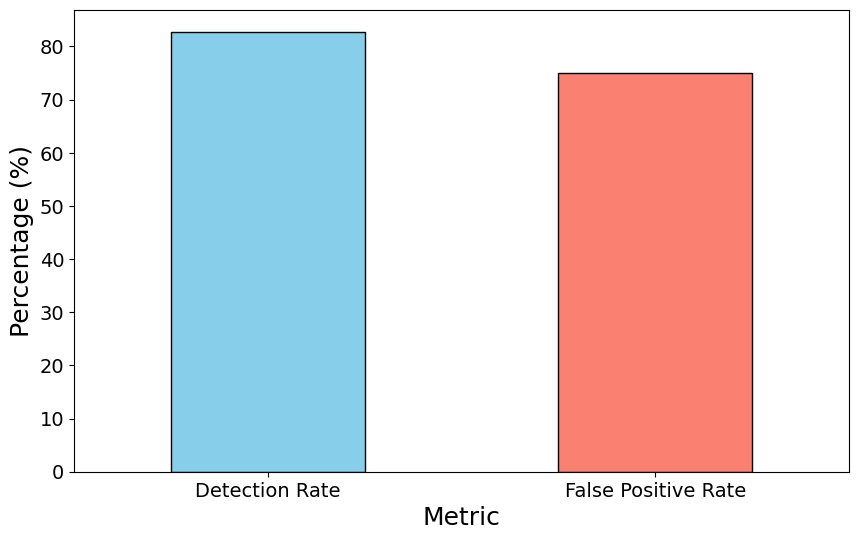

In [46]:
# Clean data, drop rows with missing key columns
phishing_data = phishingData.dropna(subset=['security_state', 'whois_domain_age', 'features.html', 'domain'])

# Define detection logic for phishing (simple heuristic)
def is_phishing(row):
    # Based on SSL validity, domain age, and suspicious keywords in `features.html`
    expired_cert = (
        pd.notna(row['security_valid_to']) and
        pd.to_datetime(row['security_valid_to']).tz_localize(None) < datetime.now()
    )
    domain_age_suspicious = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < 90
    has_suspicious_content = any(
        keyword in row['features.html'].lower()
        for keyword in ["password", "login", "verify", "account", "urgent", "suspended"]
    )
    
    # Classify as phishing if expired certificate, suspicious domain age, or suspicious content is found
    return int(expired_cert or domain_age_suspicious or has_suspicious_content)

# Apply phishing detection heuristic
phishing_data['predicted_phishing'] = phishing_data.apply(is_phishing, axis=1)

# Calculate Detection Rate
detection_rate = phishing_data['predicted_phishing'].mean() * 100

# Define legitimate domains for False Positive analysis
legitimate_domains = ["microsoft.com", "google.com", "apple.com", "amazon.com", "paypal.com"]

# False Positive calculation
phishing_data['legitimate_domain'] = phishing_data['domain'].apply(
    lambda x: any(ld in x for ld in legitimate_domains)
)
false_positives = phishing_data[(phishing_data['legitimate_domain'] == True) & (phishing_data['predicted_phishing'] == 1)]
false_positive_rate = len(false_positives) / phishing_data['legitimate_domain'].sum() * 100

# Plot Detection Rate and False Positive Rate
plt.figure(figsize=(10, 6))
rates = pd.Series([detection_rate, false_positive_rate], index=["Detection Rate", "False Positive Rate"])
rates.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
#plt.title("Detection Rate and False Positive Rate")
plt.xlabel("Metric", fontsize=18)
plt.ylabel("Percentage (%)", fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [46]:
phishing_data = phishingData.dropna(subset=['protocol', 'whois_domain_age'])

# Define a threshold for suspicious domain age (e.g., less than 90 days)
suspicious_domain_age_threshold = 90

# Define a function to approximate response based on protocol and domain age
def infer_response(row):
    # Check if protocol is insecure (http)
    insecure_protocol = row['protocol'].lower() == 'http'
    
    # Check if domain age is suspiciously low
    suspicious_domain_age = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < suspicious_domain_age_threshold
    
    # Assume a "correct response" if either condition indicates potential phishing risk
    return int(insecure_protocol or suspicious_domain_age)

# Apply the function to create a 'response_action' column
phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)

# Calculate Proxy Response Rate
response_rate = phishing_data['response_action'].mean() * 100
print(f"Proxy Response Rate: {response_rate:.2f}%")

Proxy Response Rate: 18.78%


/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/2488504907.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)


/var/folders/zm/rn7sz8ds2mv7_2kt1crb12pc0000gn/T/ipykernel_85991/3385529634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)


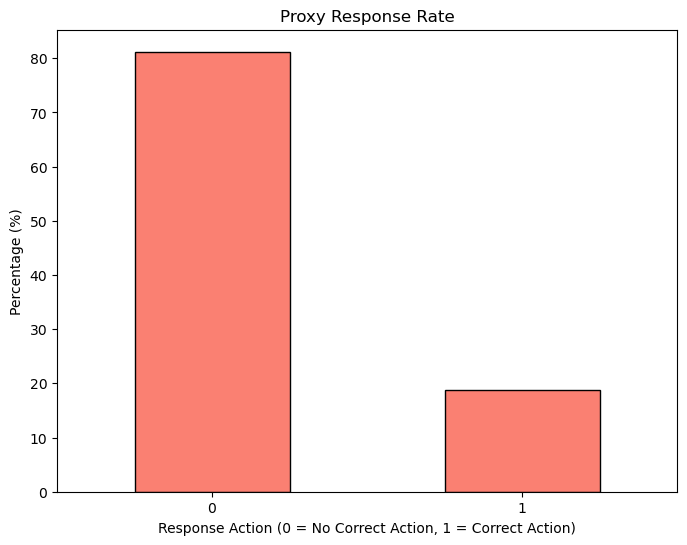

In [48]:
phishing_data = phishingData.dropna(subset=['protocol', 'whois_domain_age'])

# Define a threshold for suspicious domain age (e.g., less than 90 days)
suspicious_domain_age_threshold = 90

# Define a function to approximate response based on protocol and domain age
def infer_response(row):
    # Check if protocol is insecure (http)
    insecure_protocol = row['protocol'].lower() == 'http'
    
    # Check if domain age is suspiciously low
    suspicious_domain_age = pd.notna(row['whois_domain_age']) and float(row['whois_domain_age']) < suspicious_domain_age_threshold
    
    # Assume a "correct response" if either condition indicates potential phishing risk
    return int(insecure_protocol or suspicious_domain_age)

# Apply the function to create a 'response_action' column
phishing_data['response_action'] = phishing_data.apply(infer_response, axis=1)

# Verify that 'response_action' column is created
if 'response_action' in phishing_data.columns:
    # Calculate Proxy Response Rate
    proxy_response_rate = phishing_data['response_action'].value_counts(normalize=True) * 100

    # Plot Proxy Response Rate
    plt.figure(figsize=(8, 6))
    proxy_response_rate.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title("Proxy Response Rate")
    plt.xlabel("Response Action (0 = No Correct Action, 1 = Correct Action)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Error: 'response_action' column not created.")


## Device Type Usage: Proportion of mobile vs. desktop interactions.

Device Type Usage:
device_type
Unknown    91.341487
Mobile      6.950107
Desktop     1.708406
Name: proportion, dtype: float64


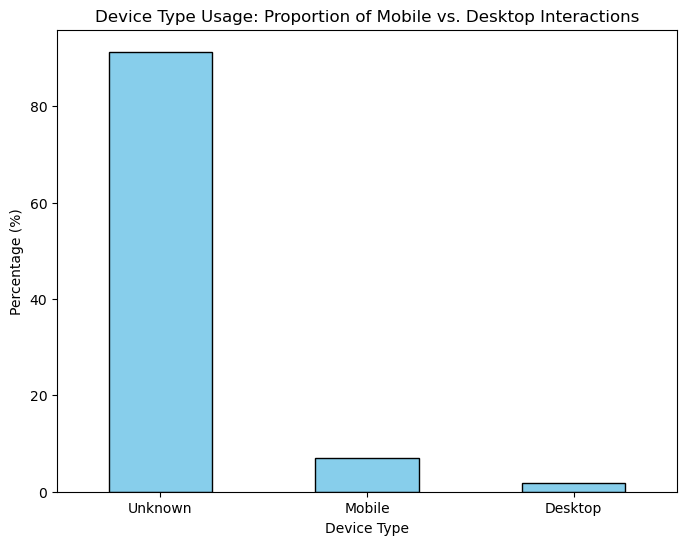

In [44]:
phishing_data = phishingData.dropna(subset=['domain'])

# Define keywords for mobile and desktop based on common patterns
mobile_indicators = ["m.", "/mobile", "android", "ios"]
desktop_indicators = ["desktop", "windows", "mac"]

# Define a function to classify device type based on URL pattern
def classify_device_type(domain):
    domain = domain.lower()
    if any(keyword in domain for keyword in mobile_indicators):
        return "Mobile"
    elif any(keyword in domain for keyword in desktop_indicators):
        return "Desktop"
    return "Unknown"

# Apply function to classify device type
phishing_data['device_type'] = phishing_data['domain'].apply(classify_device_type)

# Calculate Device Type Usage
device_type_usage = phishing_data['device_type'].value_counts(normalize=True) * 100
print("Device Type Usage:")
print(device_type_usage)


# Plot Device Type Usage
plt.figure(figsize=(8, 6))
device_type_usage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Device Type Usage: Proportion of Mobile vs. Desktop Interactions")
plt.xlabel("Device Type")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()